# AIML Week-4 Project

# Project Name: CUSTOMER SEGMENTATION USING RFM ANALYSIS & CLUSTERING


### Project Type: Unsupervised learning

### Dataset Link : (https://www.kaggle.com/datasets/vijayuv/onlineretail)

### Project prepared by : Maaz Mahboob




## **Problem Statement**: This project aims to segment customers of an online retail store using RFM analysis and unsupervised learning. By preparing the data, generating RFM features, and applying clustering techniques, the goal is to identify distinct customer groups based on their purchasing behavior. These segments can support targeted marketing, retention strategies, and better business decision-making.

#Coding Section

### Import Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Clustering & ML
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score

# Visualization
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.cluster.hierarchy import dendrogram, linkage
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Model Export
import joblib






# PHASE 1: Data Understanding

### STEP 1: DATASET LOADING

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print("\n STEP 1: DATASET LOADING")
print("-"*80)

df_old = pd.read_csv('/content/drive/MyDrive/OnlineRetail.csv', encoding='latin1')
df= df_old.copy()
print("Dataset loaded successfully!")



 STEP 1: DATASET LOADING
--------------------------------------------------------------------------------
Dataset loaded successfully!


###STEP 2: DATASET FIRST LOOK

In [ ]:
print("\nSTEP 2: DATASET FIRST LOOK")
print("-"*80)

print("\nFirst 7 Rows of the Dataset:\n")
df.head(10)


STEP 2: DATASET FIRST LOOK
--------------------------------------------------------------------------------

First 7 Rows of the Dataset:



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


### STEP 3: DATASET ROWS & COLUMNS COUNT

In [ ]:
print("\n STEP 3: DATASET DIMENSIONS")
print("-"*80)

num_rows, num_columns = df.shape

print(f'Number of rows: {num_rows}')
print(f'Number of columns: {num_columns}')


 STEP 3: DATASET DIMENSIONS
--------------------------------------------------------------------------------
Number of rows: 541909
Number of columns: 8


### STEP 4: DATASET INFORMATION

In [ ]:
print("\n STEP 4: DATASET INFORMATION")
print("-"*80)

print("\nDataset Info:")
df.info()


 STEP 4: DATASET INFORMATION
--------------------------------------------------------------------------------

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### STEP 5: UNDERSTANDING YOUR VARIABLES

In [ ]:
print("\n STEP 5: UNDERSTANDING YOUR VARIABLES")
print("-"*80)

print("\nColumns Present in the Dataset:\n")
print(df.columns.tolist())

print("\n\nData types of the columns:\n")
print(df.dtypes)


 STEP 5: UNDERSTANDING YOUR VARIABLES
--------------------------------------------------------------------------------

Columns Present in the Dataset:

['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']


Data types of the columns:

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object


### STEP 6: DATASET DESCRIPTION

In [ ]:
print("\n STEP 6: DATASET DESCRIPTION")
print("-"*80)

print("\nDescription of the Dataset:")
df.describe()


 STEP 6: DATASET DESCRIPTION
--------------------------------------------------------------------------------

Description of the Dataset:


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### STEP 7: CHECK UNIQUE VALUES

In [ ]:
print("\n STEP 7: UNIQUE VALUES CHECK")
print("-"*80)

print("\nUnique Values in each Column:")
for col in df.columns:
    unique_count = df[col].nunique()
    print(f"{col:20s}: {unique_count:5d} ")


 STEP 7: UNIQUE VALUES CHECK
--------------------------------------------------------------------------------

Unique Values in each Column:
InvoiceNo           : 25900 
StockCode           :  4070 
Description         :  4223 
Quantity            :   722 
InvoiceDate         : 23260 
UnitPrice           :  1630 
CustomerID          :  4372 
Country             :    38 


### STEP 8: VARIABLES DESCRIPTION

In [ ]:
print("\n STEP 8: VARIABLES DESCRIPTION")
print("-"*80)

print("""
VARIABLE DESCRIPTIONS:
======================

TRANSACTION IDENTIFICATION:
---------------------------
1. InvoiceNo
   • Unique transaction ID assigned to each invoice.
   • Helps identify separate purchase events.

2. StockCode
   • Product code representing the specific item purchased.
   • Useful for product-level analysis (not used in RFM features).

PRODUCT INFORMATION:
--------------------
3. Description
   • Text-based description of the product.
   • Helps understand item categories, customer preferences, etc.

TRANSACTION DETAILS:
--------------------
4. Quantity
   • Number of units purchased in the transaction.
   • Must be positive; negative values represent returns and are removed.

5. InvoiceDate
   • Date and time of the transaction.
   • Used for calculating Recency (days since last purchase).

6. UnitPrice
   • Price of a single item unit.
   • Used to compute Monetary value.

CUSTOMER INFORMATION:
---------------------
7. CustomerID
   • Unique identifier for each customer.
   • Required for RFM segmentation; rows without CustomerID are removed.

8. Country
   • Country where the order was placed.
   • Helps analyze geographical buying behavior.
""")


 STEP 8: VARIABLES DESCRIPTION
--------------------------------------------------------------------------------

VARIABLE DESCRIPTIONS:

TRANSACTION IDENTIFICATION:
---------------------------
1. InvoiceNo
   • Unique transaction ID assigned to each invoice.
   • Helps identify separate purchase events.

2. StockCode
   • Product code representing the specific item purchased.
   • Useful for product-level analysis (not used in RFM features).

PRODUCT INFORMATION:
--------------------
3. Description
   • Text-based description of the product.
   • Helps understand item categories, customer preferences, etc.

TRANSACTION DETAILS:
--------------------
4. Quantity
   • Number of units purchased in the transaction.
   • Must be positive; negative values represent returns and are removed.

5. InvoiceDate
   • Date and time of the transaction.
   • Used for calculating Recency (days since last purchase).

6. UnitPrice
   • Price of a single item unit.
   • Used to compute Monetary value.

CU

#  PHASE 2: DATA PREPARATION

###STEP 9: MISSING VALUES COUNT

In [ ]:
print("\n STEP 9: MISSING VALUES COUNT")
print("-"*80)

print("\nMissing values count:\n")
missing_counts = df.isnull().sum()
print(missing_counts)

print(f"\nTotal missing values: {missing_counts.sum()}")


 STEP 9: MISSING VALUES COUNT
--------------------------------------------------------------------------------

Missing values count:

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Total missing values: 136534


### VISUALIZING MISSING VALUES

In [ ]:
print("\n VISUALIZING MISSING VALUES")
print("-"*80)

missing_data = df.isnull().sum()

fig = px.bar(
    x=missing_data.index,
    y=missing_data.values,
    labels={'x': 'Columns', 'y': 'Missing Count'},
    title='Missing Values Count by Column',
    color=missing_data.values,
    color_continuous_scale='Reds'
)
fig.update_traces(texttemplate='%{y}', textposition='outside')
fig.update_layout(height=500, width=800)
fig.show()

total_missing = missing_data.sum()
if total_missing == 0:
    print("✓ No missing values found in the dataset! ✅")
else:
    print(f"⚠ Found {total_missing} missing values in the dataset.")




 VISUALIZING MISSING VALUES
--------------------------------------------------------------------------------


⚠ Found 136534 missing values in the dataset.


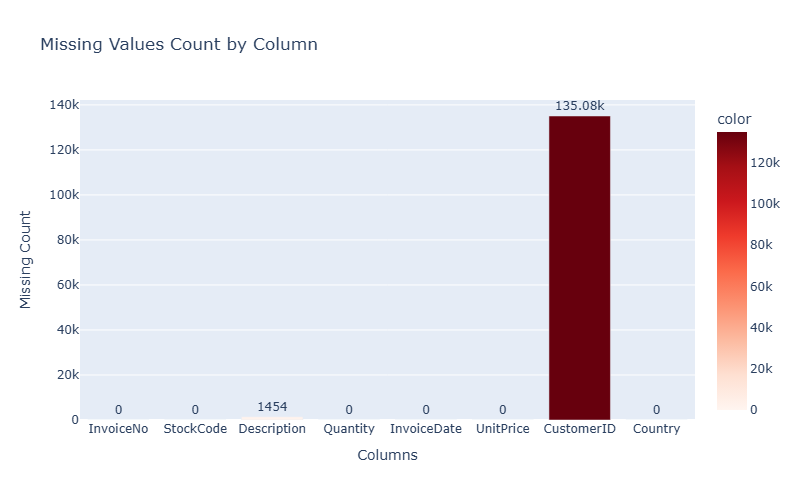

### STEP 10: HANDLE MISSING VALUES

In [ ]:
# Remove missing CustomerID
initial_rows = len(df)
df = df.dropna(subset=['CustomerID'])
print(f"✓ Removed {initial_rows - len(df)} rows with missing CustomerID")

#  Remove missing Description
df = df.dropna(subset=['Description'])
print(f"✓ Removed rows with missing Description")

✓ Removed 135080 rows with missing CustomerID
✓ Removed rows with missing Description


### STEP 11: Handle Duplicate Rows

In [ ]:
print("\n2. REMOVE EXACT DUPLICATES")
print("-"*40)

print(f"Checking for duplicate rows...")
print(f"Duplicates found: {df.duplicated().sum()}")

df = df.drop_duplicates()
print(f"Shape after removing duplicates: {df.shape}")


2. REMOVE EXACT DUPLICATES
----------------------------------------
Checking for duplicate rows...
Duplicates found: 5225
Shape after removing duplicates: (401604, 8)


### STEP 12: FIX INCONSISTENT ENTRIES

In [ ]:
#  Remove negative quantities (returns/cancellations)
df = df[df['Quantity'] > 0]
print(f"✓ Removed negative quantities (returns)")

#  Remove negative prices
df = df[df['UnitPrice'] > 0]
print(f"✓ Removed negative/zero prices")

#  Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

✓ Removed negative quantities (returns)
✓ Removed negative/zero prices


In [ ]:
print(f"\n✓ Final cleaned dataset shape: {df.shape}")
print(f"✓ Date range: {df['InvoiceDate'].min()} to {df['InvoiceDate'].max()}")


✓ Final cleaned dataset shape: (392692, 8)
✓ Date range: 2010-12-01 08:26:00 to 2011-12-09 12:50:00


### STEP 13: FEATURE ENGINEERING

In [ ]:
#  Create TotalAmount column
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']

# Define snapshot date (1 day after last transaction)
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
print(f"\nSnapshot Date for Recency Calculation: {snapshot_date}")

# Create RFM features
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',  # Frequency
    'TotalAmount': 'sum'  # Monetary
}).reset_index()

# Rename columns
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

print(f"\n✓ RFM features created for {len(rfm)} customers")
print(f"\nRFM Summary Statistics:")
print(rfm.describe())



Snapshot Date for Recency Calculation: 2011-12-10 12:50:00

✓ RFM features created for 4338 customers

RFM Summary Statistics:
         CustomerID      Recency    Frequency       Monetary
count   4338.000000  4338.000000  4338.000000    4338.000000
mean   15300.408022    92.536422     4.272015    2048.688081
std     1721.808492   100.014169     7.697998    8985.230220
min    12346.000000     1.000000     1.000000       3.750000
25%    13813.250000    18.000000     1.000000     306.482500
50%    15299.500000    51.000000     2.000000     668.570000
75%    16778.750000   142.000000     5.000000    1660.597500
max    18287.000000   374.000000   209.000000  280206.020000


In [ ]:
df.head(7)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50


### STEP 14: DETECT & TREAT OUTLIERS

In [ ]:
print(f"\n{'='*80}")
print("OUTLIER ANALYSIS (DETECTION ONLY — NO REMOVAL)")
print("="*80)

def detect_outliers_iqr(df, columns):
    """Detect outliers using the IQR method without removing them."""
    results = []

    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        # Count outliers
        mask = (df[col] < lower) | (df[col] > upper)
        outlier_count = mask.sum()
        outlier_percent = (outlier_count / len(df)) * 100

        results.append({
            "Column": col,
            "Outliers": outlier_count,
            "Percentage": f"{outlier_percent:.2f}%",
            "Lower_Bound": lower,
            "Upper_Bound": upper
        })

    return pd.DataFrame(results)

# Run detection
outlier_report = detect_outliers_iqr(rfm, ['Recency', 'Frequency', 'Monetary'])

print("\nOutlier Summary:")
display(outlier_report)

print("\nNote:")
print("We do NOT remove outliers for RFM-based customer segmentation because:")
print("1) High-Monetary and High-Frequency \"outliers\" represent real VIP or bulk customers.")
print("2) Imputing or deleting them causes misleading clusters in unsupervised learning.")




OUTLIER ANALYSIS (DETECTION ONLY — NO REMOVAL)

Outlier Summary:


,Column,Outliers,Percentage,Lower_Bound,Upper_Bound
0,Recency,155,3.57%,-168.00,328.00
1,Frequency,285,6.57%,-5.00,11.00
2,Monetary,425,9.80%,-1724.69,3691.77



Note:
We do NOT remove outliers for RFM-based customer segmentation because:
1) High-Monetary and High-Frequency "outliers" represent real VIP or bulk customers.
2) Imputing or deleting them causes misleading clusters in unsupervised learning.


### STEP 15 : Standardization

In [ ]:
print(f"\n{'='*80}")
print("FEATURE STANDARDIZATION")
print("="*80)

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])
rfm_scaled_df = pd.DataFrame(rfm_scaled, columns=['Recency_scaled', 'Frequency_scaled', 'Monetary_scaled'])

print("✓ Features standardized using StandardScaler")
print("\nScaled Features Summary:")
print(rfm_scaled_df.describe())


FEATURE STANDARDIZATION
✓ Features standardized using StandardScaler

Scaled Features Summary:
       Recency_scaled  Frequency_scaled  Monetary_scaled
count    4.338000e+03      4.338000e+03     4.338000e+03
mean     2.702618e-17      1.801745e-17     2.293130e-17
std      1.000115e+00      1.000115e+00     1.000115e+00
min     -9.153401e-01     -4.250965e-01    -2.276151e-01
25%     -7.453445e-01     -4.250965e-01    -1.939190e-01
50%     -4.153533e-01     -2.951776e-01    -1.536162e-01
75%      4.946227e-01      9.457903e-02    -4.319704e-02
max      2.814561e+00      2.659803e+01     3.096074e+01


# PHASE 3: EXPLORATORY DATA ANALYSIS (EDA)

In [ ]:
#  Recency
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

col = 'Recency'
series = rfm[col].dropna()

# Stats
desc = series.describe()
Q1, Q3 = series.quantile(0.25), series.quantile(0.75)
IQR = Q3 - Q1
lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
outlier_mask = (series < lower) | (series > upper)
outlier_count = outlier_mask.sum()
outlier_pct = outlier_count / len(series) * 100

print("\n" + "="*60)
print(f"Feature: {col}")
print("="*60)
print(f"count: {int(desc['count'])}   mean: {desc['mean']:.2f}   std: {desc['std']:.2f}   median: {desc['50%']:.2f}")
print(f"min: {desc['min']:.2f}   25%: {Q1:.2f}   75%: {Q3:.2f}   max: {desc['max']:.2f}")
print(f"IQR: {IQR:.2f}   outliers: {outlier_count} ({outlier_pct:.2f}%)")
print("="*60)

# Plot
fig = make_subplots(rows=2, cols=1,
                    shared_xaxes=False,
                    vertical_spacing=0.14,
                    row_heights=[0.70, 0.30],
                    subplot_titles=(f"{col} Distribution", f"{col} Boxplot"))

fig.add_trace(go.Histogram(x=series, nbinsx=50, marker=dict(line=dict(width=0.3, color='black')), opacity=0.85), row=1, col=1)
fig.add_trace(go.Scatter(x=series, y=[0]*len(series), mode='markers', marker=dict(size=3, opacity=0.25), showlegend=False), row=1, col=1)
fig.add_trace(go.Box(x=series, boxpoints="outliers", orientation='h', marker=dict(size=4)), row=2, col=1)

fig.update_xaxes(title_text=col, showticklabels=True, row=1, col=1)
fig.update_xaxes(title_text=col, showticklabels=True, row=2, col=1)
fig.update_yaxes(title_text="Count", row=1, col=1)

fig.update_layout(height=700, width=900, title_text=f"RFM Feature — {col}", template="plotly_white", margin=dict(t=80, b=80, l=60, r=40))
fig.show()



Feature: Recency
count: 4338   mean: 92.54   std: 100.01   median: 51.00
min: 1.00   25%: 18.00   75%: 142.00   max: 374.00
IQR: 124.00   outliers: 155 (3.57%)


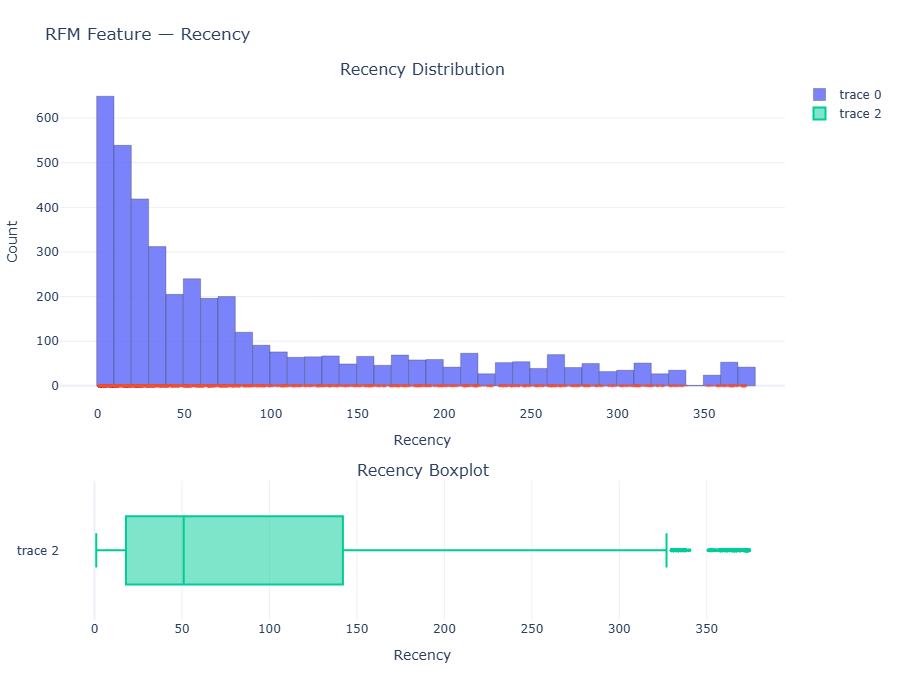

In [ ]:
# CELL: Frequency EDA
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

col = 'Frequency'
series = rfm[col].dropna()

# Stats
desc = series.describe()
Q1, Q3 = series.quantile(0.25), series.quantile(0.75)
IQR = Q3 - Q1
lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
outlier_mask = (series < lower) | (series > upper)
outlier_count = outlier_mask.sum()
outlier_pct = outlier_count / len(series) * 100

print("\n" + "="*60)
print(f"Feature: {col}")
print("="*60)
print(f"count: {int(desc['count'])}   mean: {desc['mean']:.2f}   std: {desc['std']:.2f}   median: {desc['50%']:.2f}")
print(f"min: {desc['min']:.2f}   25%: {Q1:.2f}   75%: {Q3:.2f}   max: {desc['max']:.2f}")
print(f"IQR: {IQR:.2f}   outliers: {outlier_count} ({outlier_pct:.2f}%)")
print("="*60)

# Plot
fig = make_subplots(rows=2, cols=1,
                    shared_xaxes=False,
                    vertical_spacing=0.14,
                    row_heights=[0.70, 0.30],
                    subplot_titles=(f"{col} Distribution", f"{col} Boxplot"))

fig.add_trace(go.Histogram(x=series, nbinsx=50, marker=dict(line=dict(width=0.3, color='black')), opacity=0.85), row=1, col=1)
fig.add_trace(go.Scatter(x=series, y=[0]*len(series), mode='markers', marker=dict(size=3, opacity=0.25), showlegend=False), row=1, col=1)
fig.add_trace(go.Box(x=series, boxpoints="outliers", orientation='h', marker=dict(size=4)), row=2, col=1)

# Ensure x-axis ticks visible
fig.update_xaxes(title_text=col, showticklabels=True, row=1, col=1)
fig.update_xaxes(title_text=col, showticklabels=True, row=2, col=1)
fig.update_yaxes(title_text="Count", row=1, col=1)

fig.update_layout(height=700, width=900, title_text=f"RFM Feature — {col}", template="plotly_white", margin=dict(t=80, b=80, l=60, r=40))
fig.show()



Feature: Frequency
count: 4338   mean: 4.27   std: 7.70   median: 2.00
min: 1.00   25%: 1.00   75%: 5.00   max: 209.00
IQR: 4.00   outliers: 285 (6.57%)


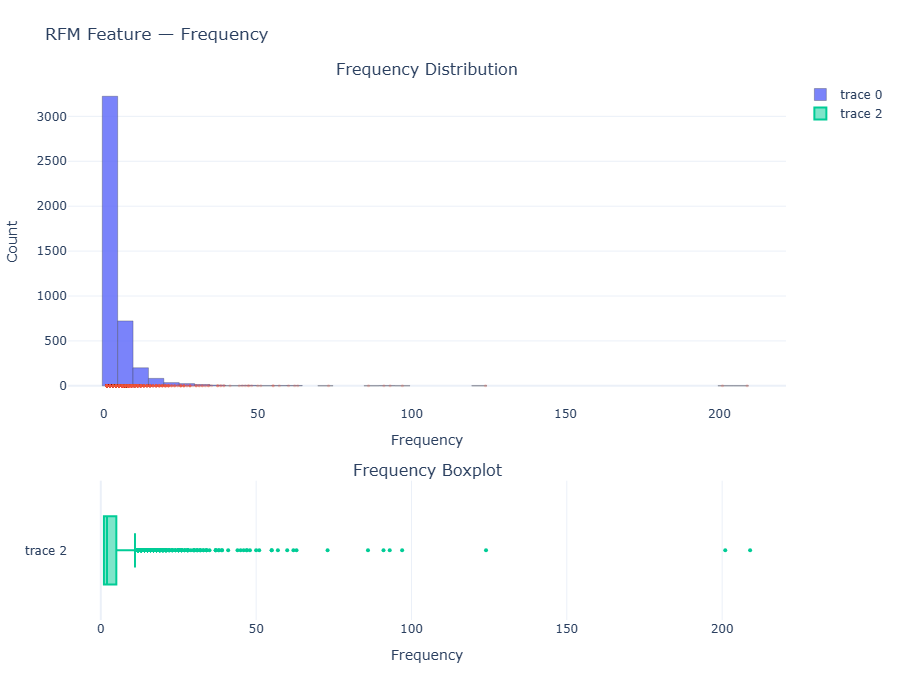

In [ ]:
# CELL: Monetary EDA
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

col = 'Monetary'
series = rfm[col].dropna()

# Stats
desc = series.describe()
Q1, QQ3 = series.quantile(0.25), series.quantile(0.75)
IQR = QQ3 - Q1
lower, upper = Q1 - 1.5 * IQR, QQ3 + 1.5 * IQR
outlier_mask = (series < lower) | (series > upper)
outlier_count = outlier_mask.sum()
outlier_pct = outlier_count / len(series) * 100

print("\n" + "="*60)
print(f"Feature: {col}")
print("="*60)
print(f"count: {int(desc['count'])}   mean: {desc['mean']:.2f}   std: {desc['std']:.2f}   median: {desc['50%']:.2f}")
print(f"min: {desc['min']:.2f}   25%: {Q1:.2f}   75%: {QQ3:.2f}   max: {desc['max']:.2f}")
print(f"IQR: {IQR:.2f}   outliers: {outlier_count} ({outlier_pct:.2f}%)")
print("="*60)

# Plot
fig = make_subplots(rows=2, cols=1,
                    shared_xaxes=False,
                    vertical_spacing=0.14,
                    row_heights=[0.70, 0.30],
                    subplot_titles=(f"{col} Distribution", f"{col} Boxplot"))

fig.add_trace(go.Histogram(x=series, nbinsx=50, marker=dict(line=dict(width=0.3, color='black')), opacity=0.85), row=1, col=1)
fig.add_trace(go.Scatter(x=series, y=[0]*len(series), mode='markers', marker=dict(size=3, opacity=0.25), showlegend=False), row=1, col=1)
fig.add_trace(go.Box(x=series, boxpoints="outliers", orientation='h', marker=dict(size=4)), row=2, col=1)

# Ensure x-axis ticks visible
fig.update_xaxes(title_text=col, showticklabels=True, row=1, col=1)
fig.update_xaxes(title_text=col, showticklabels=True, row=2, col=1)
fig.update_yaxes(title_text="Count", row=1, col=1)

fig.update_layout(height=700, width=900, title_text=f"RFM Feature — {col}", template="plotly_white", margin=dict(t=80, b=80, l=60, r=40))
fig.show()



Feature: Monetary
count: 4338   mean: 2048.69   std: 8985.23   median: 668.57
min: 3.75   25%: 306.48   75%: 1660.60   max: 280206.02
IQR: 1354.11   outliers: 425 (9.80%)


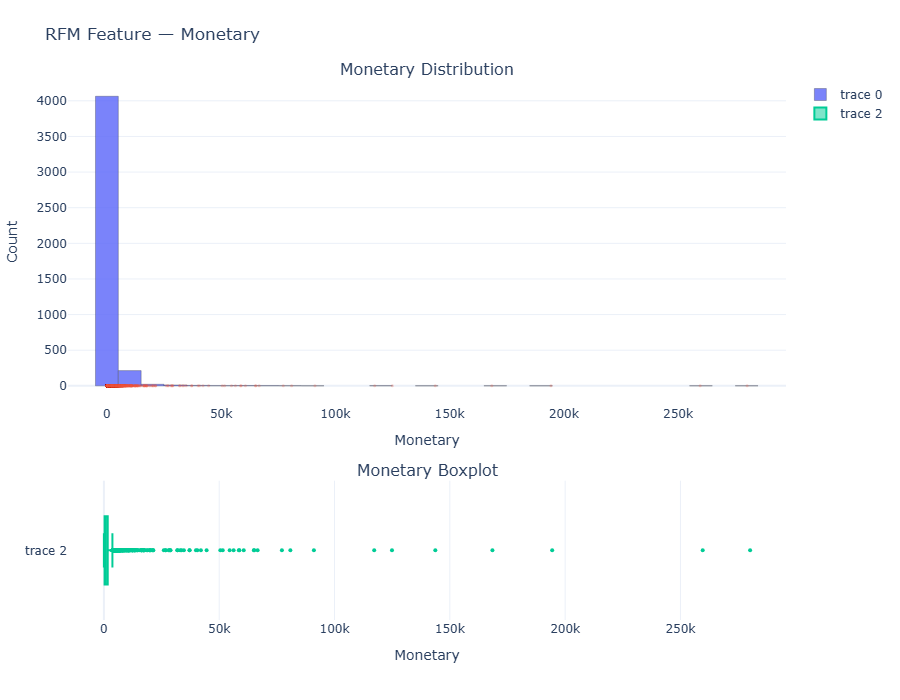

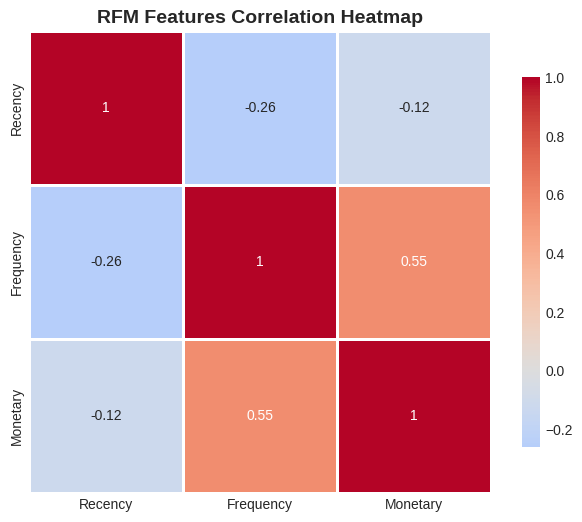

✓ Correlation heatmap generated

Correlation Insights:
            Recency  Frequency  Monetary
Recency    1.000000  -0.260578 -0.121831
Frequency -0.260578   1.000000  0.552780
Monetary  -0.121831   0.552780  1.000000


In [ ]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = rfm[['Recency', 'Frequency', 'Monetary']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('RFM Features Correlation Heatmap', fontsize=14, fontweight='bold')
plt.savefig('rfm_correlation.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Correlation heatmap generated")
print("\nCorrelation Insights:")
print(correlation_matrix)



Generating pairplot...


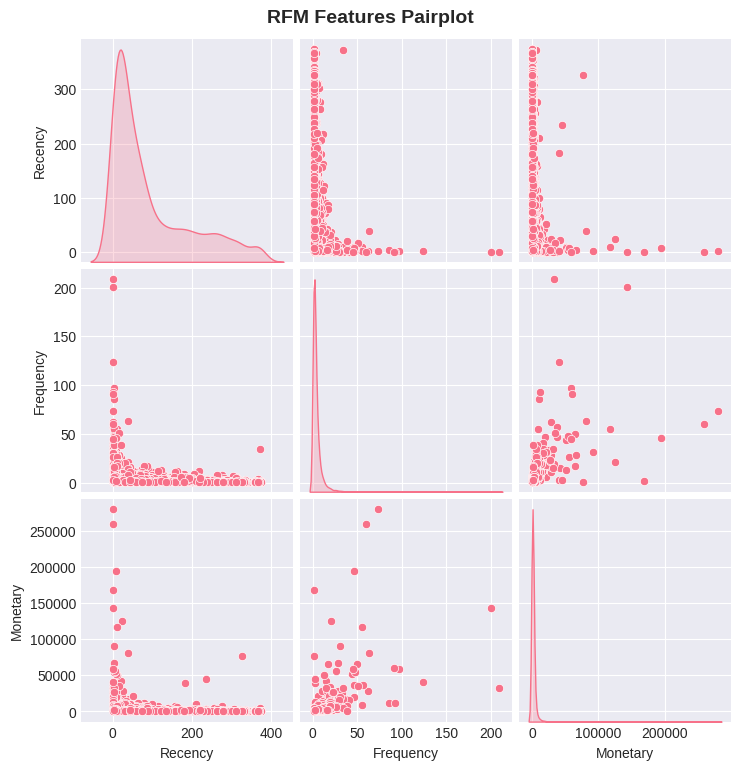

✓ Pairplot generated


In [ ]:
# Pairplot
print("\nGenerating pairplot...")
sns.pairplot(rfm[['Recency', 'Frequency', 'Monetary']], diag_kind='kde')
plt.suptitle('RFM Features Pairplot', y=1.02, fontsize=14, fontweight='bold')
plt.savefig('rfm_pairplot.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Pairplot generated")


PCA ANALYSIS

Explained Variance by Component:
PC1: 55.47% (Cumulative: 55.47%)
PC2: 30.25% (Cumulative: 85.73%)
PC3: 14.27% (Cumulative: 100.00%)


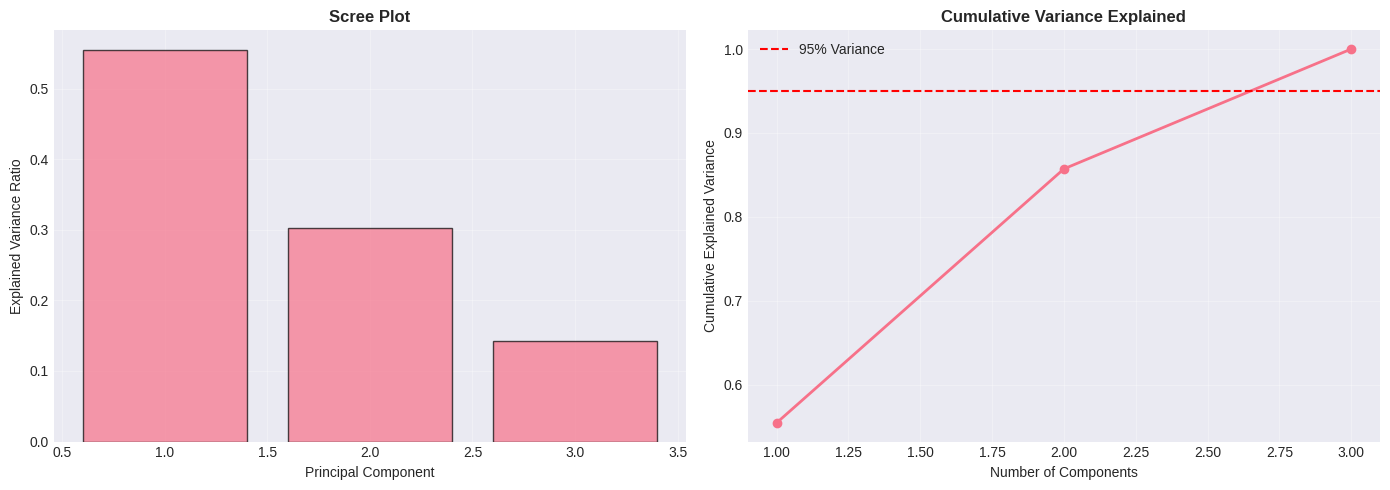

✓ PCA analysis completed


In [ ]:
# PCA for dimensionality reduction (before clustering)
print(f"\n{'='*80}")
print("PCA ANALYSIS")
print("="*80)

pca = PCA()
pca_features = pca.fit_transform(rfm_scaled)

# Explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print(f"\nExplained Variance by Component:")
for i, var in enumerate(explained_variance):
    print(f"PC{i+1}: {var*100:.2f}% (Cumulative: {cumulative_variance[i]*100:.2f}%)")

# Scree plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].bar(range(1, len(explained_variance)+1), explained_variance, alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Principal Component')
axes[0].set_ylabel('Explained Variance Ratio')
axes[0].set_title('Scree Plot', fontweight='bold')
axes[0].grid(True, alpha=0.3)

axes[1].plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linewidth=2)
axes[1].axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
axes[1].set_xlabel('Number of Components')
axes[1].set_ylabel('Cumulative Explained Variance')
axes[1].set_title('Cumulative Variance Explained', fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('pca_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ PCA analysis completed")


# PHASE 4: CLUSTERING


PHASE 4: CLUSTERING ANALYSIS

--- K-MEANS CLUSTERING ---

Calculating optimal number of clusters...
K=2: Inertia=9014.57, Silhouette=0.8958
K=3: Inertia=5441.32, Silhouette=0.5942
K=4: Inertia=4096.30, Silhouette=0.6162
K=5: Inertia=3119.79, Silhouette=0.6165
K=6: Inertia=2473.79, Silhouette=0.5983
K=7: Inertia=2023.59, Silhouette=0.5165
K=8: Inertia=1717.01, Silhouette=0.4859
K=9: Inertia=1468.79, Silhouette=0.4784
K=10: Inertia=1281.05, Silhouette=0.4792


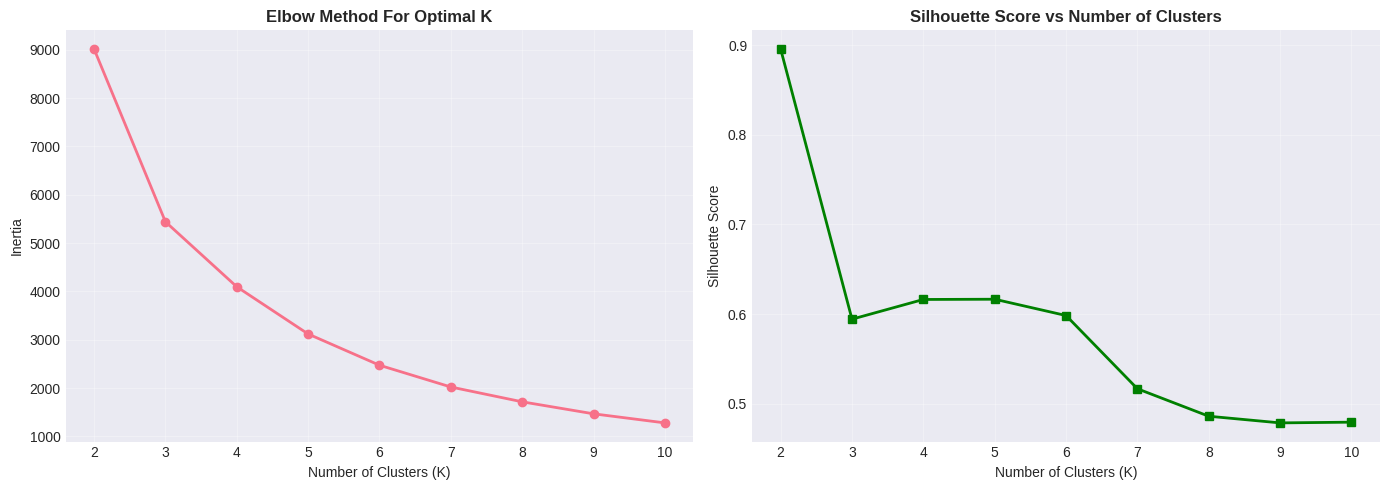

In [ ]:
print("\n" + "="*80)
print("PHASE 4: CLUSTERING ANALYSIS")
print("="*80)

# -------------------------
# K-MEANS CLUSTERING
# -------------------------
print("\n--- K-MEANS CLUSTERING ---")

# Elbow Method
inertias = []
silhouette_scores = []
K_range = range(2, 11)

print("\nCalculating optimal number of clusters...")
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(rfm_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(rfm_scaled, kmeans.labels_))
    print(f"K={k}: Inertia={kmeans.inertia_:.2f}, Silhouette={silhouette_scores[-1]:.4f}")

# Plot Elbow Method and Silhouette Scores
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(K_range, inertias, marker='o', linewidth=2)
axes[0].set_xlabel('Number of Clusters (K)')
axes[0].set_ylabel('Inertia')
axes[0].set_title('Elbow Method For Optimal K', fontweight='bold')
axes[0].grid(True, alpha=0.3)

axes[1].plot(K_range, silhouette_scores, marker='s', linewidth=2, color='green')
axes[1].set_xlabel('Number of Clusters (K)')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Silhouette Score vs Number of Clusters', fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('elbow_silhouette.png', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
# Select K = 4
optimal_k = 4
print(f"\n✓ Optimal number of clusters: {optimal_k}")

# Final K-Means clustering
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
rfm['Cluster_KMeans'] = kmeans_final.fit_predict(rfm_scaled)

print(f"\n✓ K-Means clustering completed with {optimal_k} clusters")
print("\nCluster Distribution:")
print(rfm['Cluster_KMeans'].value_counts().sort_index())



✓ Optimal number of clusters: 4

✓ K-Means clustering completed with 4 clusters

Cluster Distribution:
Cluster_KMeans
0    3054
1    1067
2      13
3     204
Name: count, dtype: int64



HIERARCHICAL CLUSTERING (Silhouette Evaluation)

Calculating silhouette scores for Hierarchical Clustering...
K=2: Silhouette=0.9199
K=3: Silhouette=0.5774
K=4: Silhouette=0.6077
K=5: Silhouette=0.6085
K=6: Silhouette=0.3942
K=7: Silhouette=0.3819
K=8: Silhouette=0.3822
K=9: Silhouette=0.3824
K=10: Silhouette=0.3864


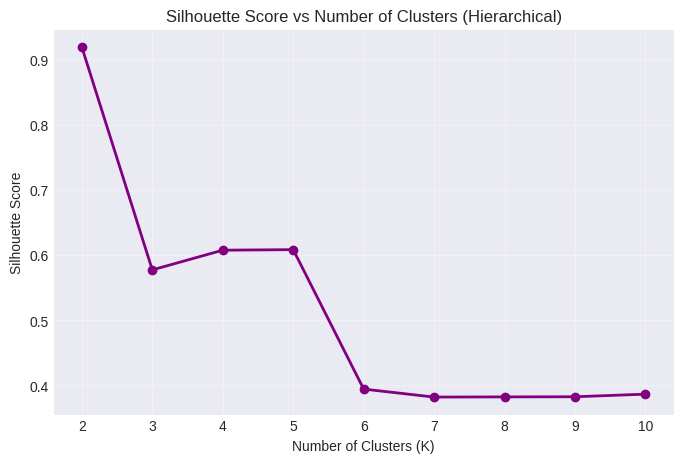

In [ ]:
print("\n" + "="*80)
print("HIERARCHICAL CLUSTERING (Silhouette Evaluation)")
print("="*80)

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

silhouette_values_hier = []
K_range = range(2, 11)

print("\nCalculating silhouette scores for Hierarchical Clustering...")

for k in K_range:
    hierarchical = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = hierarchical.fit_predict(rfm_scaled)

    sil = silhouette_score(rfm_scaled, labels)
    silhouette_values_hier.append(sil)

    print(f"K={k}: Silhouette={sil:.4f}")

# ----------- PLOT ------------
plt.figure(figsize=(8,5))
plt.plot(K_range, silhouette_values_hier, marker='o', linewidth=2, color='purple')
plt.title("Silhouette Score vs Number of Clusters (Hierarchical)")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.grid(alpha=0.3)
plt.show()


In [ ]:
print("\n" + "="*80)
print("HIERARCHICAL CLUSTERING REPORT")
print("="*80)

print(f"\n✓ Optimal number of clusters: 4")

# Hierarchical clustering results
hierarchical = AgglomerativeClustering(n_clusters=4, linkage='ward')
rfm['Cluster_Hierarchical'] = hierarchical.fit_predict(rfm_scaled)

print(f"\n✓ Hierarchical clustering completed with 4 clusters")

print("\nCluster Distribution:")
print(rfm['Cluster_Hierarchical'].value_counts().sort_index())

# Cluster quality: silhouette only (valid for hierarchical)
from sklearn.metrics import silhouette_score

sil_score_hier = silhouette_score(rfm_scaled, rfm['Cluster_Hierarchical'])
print(f"\nSilhouette Score: {sil_score_hier:.4f}")



HIERARCHICAL CLUSTERING REPORT

✓ Optimal number of clusters: 4

✓ Hierarchical clustering completed with 4 clusters

Cluster Distribution:
Cluster_Hierarchical
0      15
1    3042
2    1134
3     147
Name: count, dtype: int64

Silhouette Score: 0.6077



Calculating DBSCAN results over eps values...
eps=0.10: Clusters=26, Silhouette=-0.2795
eps=0.20: Clusters=3, Silhouette=0.5721
eps=0.30: Clusters=2, Silhouette=0.6743
eps=0.40: Clusters=1, Silhouette=NA
eps=0.50: Clusters=1, Silhouette=NA
eps=0.60: Clusters=1, Silhouette=NA

✓ Best eps by silhouette: 0.30 (Silhouette=0.6743)


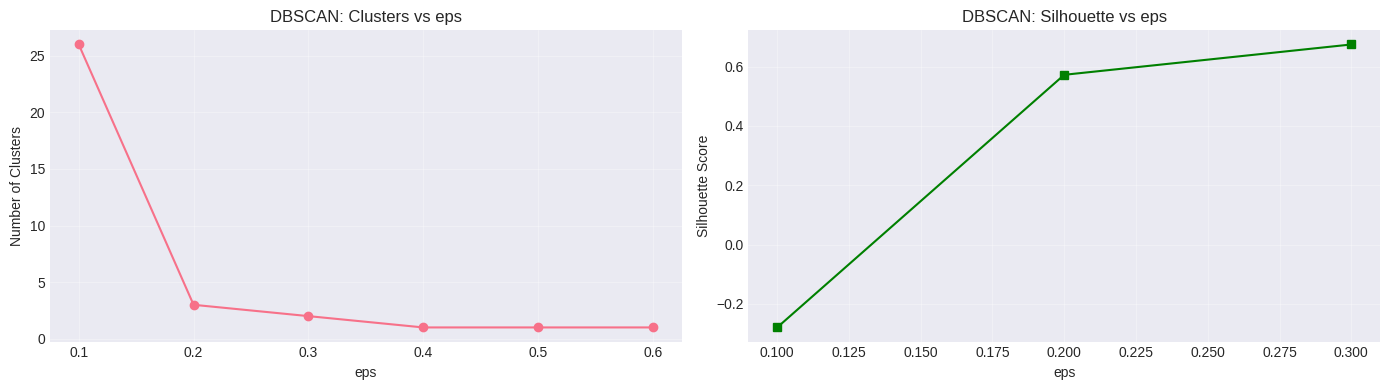


Running final DBSCAN with eps=0.30, min_samples=5

Cluster Distribution (including noise = -1):
Cluster_DBSCAN
-1     107
 0    4225
 1       6
Name: count, dtype: int64


In [ ]:
# Simple DBSCAN sweep (Silhouette + Cluster Count Only)
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

# Limit eps range as requested
eps_values = np.round(np.linspace(0.1, 0.6, 6), 2)
min_samples = 5

n_clusters_list = []
silhouette_list = []

print("\nCalculating DBSCAN results over eps values...")
for eps in eps_values:
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(rfm_scaled)
    labels = db.labels_

    # count clusters (ignore noise -1)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_clusters_list.append(n_clusters)

    # silhouette only when >=2 clusters
    if n_clusters >= 2:
        mask = labels != -1
        if mask.sum() > 1 and len(set(labels[mask])) >= 2:
            sil = silhouette_score(rfm_scaled[mask], labels[mask])
        else:
            sil = np.nan
    else:
        sil = np.nan

    silhouette_list.append(sil)

    sil_str = f"{sil:.4f}" if not np.isnan(sil) else "NA"
    print(f"eps={eps:.2f}: Clusters={n_clusters}, Silhouette={sil_str}")

# Best eps by silhouette (ignore NaN)
valid_idx = [i for i, s in enumerate(silhouette_list) if not np.isnan(s)]
if valid_idx:
    best_idx = max(valid_idx, key=lambda i: silhouette_list[i])
    best_eps = eps_values[best_idx]
    best_sil = silhouette_list[best_idx]
    print(f"\n✓ Best eps by silhouette: {best_eps:.2f} (Silhouette={best_sil:.4f})")
else:
    best_eps = 0.3
    print("\n✓ No valid silhouette found — using default eps=0.3")

# Plot clusters vs eps, silhouette vs eps
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

axes[0].plot(eps_values, n_clusters_list, marker='o')
axes[0].set_xlabel("eps")
axes[0].set_ylabel("Number of Clusters")
axes[0].set_title("DBSCAN: Clusters vs eps")
axes[0].grid(True, alpha=0.3)

axes[1].plot(eps_values, [s if not np.isnan(s) else None for s in silhouette_list],
             marker='s', color='green')
axes[1].set_xlabel("eps")
axes[1].set_ylabel("Silhouette Score")
axes[1].set_title("DBSCAN: Silhouette vs eps")
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Final DBSCAN run
print(f"\nRunning final DBSCAN with eps={best_eps:.2f}, min_samples={min_samples}")
db_final = DBSCAN(eps=best_eps, min_samples=min_samples).fit(rfm_scaled)
rfm['Cluster_DBSCAN'] = db_final.labels_

print("\nCluster Distribution (including noise = -1):")
print(rfm['Cluster_DBSCAN'].value_counts().sort_index())



T-SNE DIMENSIONALITY REDUCTION

Computing t-SNE (this may take a moment)...
✓ t-SNE transformation completed


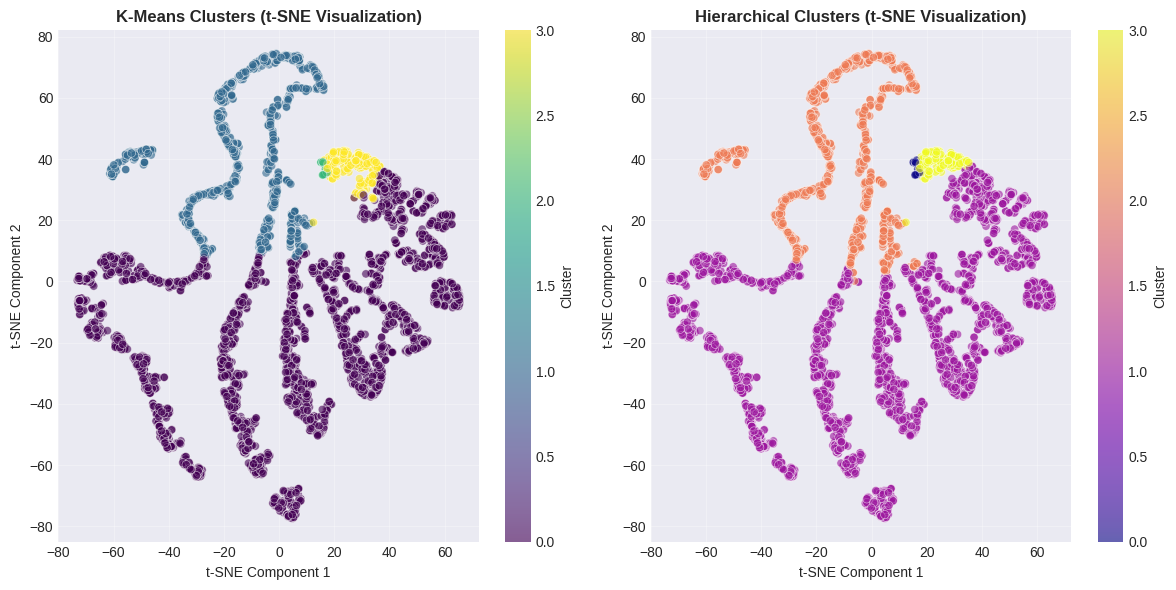

✓ t-SNE visualizations generated


In [ ]:
# -------------------------
# T-SNE VISUALIZATION
# -------------------------
print(f"\n{'='*80}")
print("T-SNE DIMENSIONALITY REDUCTION")
print("="*80)

print("\nComputing t-SNE (this may take a moment)...")
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
tsne_features = tsne.fit_transform(rfm_scaled)

# Add t-SNE components to dataframe
rfm['TSNE1'] = tsne_features[:, 0]
rfm['TSNE2'] = tsne_features[:, 1]

print("✓ t-SNE transformation completed")

# Visualize t-SNE clusters
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
scatter = plt.scatter(rfm['TSNE1'], rfm['TSNE2'],
                     c=rfm['Cluster_KMeans'], cmap='viridis',
                     alpha=0.6, edgecolors='w', linewidth=0.5)
plt.colorbar(scatter, label='Cluster')
plt.title('K-Means Clusters (t-SNE Visualization)', fontweight='bold')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
scatter = plt.scatter(rfm['TSNE1'], rfm['TSNE2'],
                     c=rfm['Cluster_Hierarchical'], cmap='plasma',
                     alpha=0.6, edgecolors='w', linewidth=0.5)
plt.colorbar(scatter, label='Cluster')
plt.title('Hierarchical Clusters (t-SNE Visualization)', fontweight='bold')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('tsne_clusters.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ t-SNE visualizations generated")


In [ ]:
# K-MEANS VISUALIZATION (run this cell)
import numpy as np
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Prepare features (create log + scale if not present)
if not {'Recency_log','Frequency_log','Monetary_log'}.issubset(rfm.columns):
    rfm['Recency_log']   = np.log1p(rfm['Recency'])
    rfm['Frequency_log'] = np.log1p(rfm['Frequency'])
    rfm['Monetary_log']  = np.log1p(rfm['Monetary'])

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency_log','Frequency_log','Monetary_log']])

# Fit KMeans
k = 4
kmeans = KMeans(n_clusters=k, init='k-means++', n_init=20, max_iter=500, random_state=42)
rfm['Cluster_KMeans'] = kmeans.fit_predict(rfm_scaled).astype(int)

# Prepare label strings for legend and hover id
rfm['CustID_str'] = rfm['CustomerID'].astype('Int64').astype(str) if 'CustomerID' in rfm.columns else rfm.index.astype(str)
rfm['_label_km'] = rfm['Cluster_KMeans'].apply(lambda x: f'cluster_{int(x)}')

# 3D Plot — wider layout
fig3d = px.scatter_3d(
    rfm,
    x='Recency_log', y='Frequency_log', z='Monetary_log',
    color='_label_km',
    hover_data=['CustID_str','Recency','Frequency','Monetary'],
    title=f'KMeans (k={k}) — 3D RFM (log)',
    width=1200, height=700,
    opacity=0.8
)
fig3d.update_traces(marker=dict(size=4))
fig3d.show()

# 2D PCA companion
pca = PCA(n_components=2, random_state=42)
pcs = pca.fit_transform(rfm_scaled)
rfm['PC1'] = pcs[:,0]; rfm['PC2'] = pcs[:,1]

fig2d = px.scatter(
    rfm, x='PC1', y='PC2', color='_label_km',
    hover_data=['CustID_str','Recency','Frequency','Monetary'],
    title=f'KMeans (k={k}) — PCA 2D',
    width=900, height=600, opacity=0.8
)
fig2d.show()


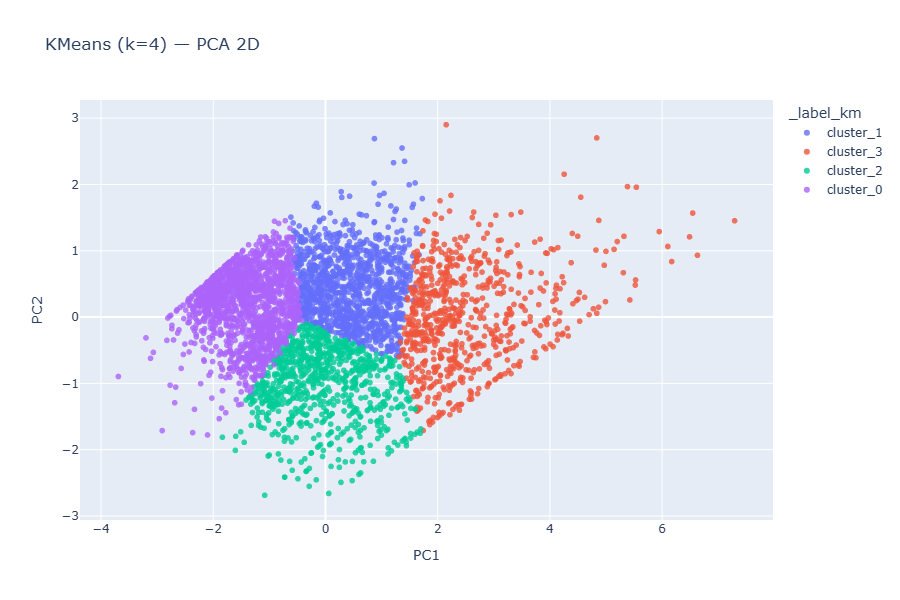

In [ ]:
# HIERARCHICAL VISUALIZATION
import numpy as np
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

# Ensure features + scaled are present (if previous cell ran they already are)
if not {'Recency_log','Frequency_log','Monetary_log'}.issubset(rfm.columns):
    rfm['Recency_log']   = np.log1p(rfm['Recency'])
    rfm['Frequency_log'] = np.log1p(rfm['Frequency'])
    rfm['Monetary_log']  = np.log1p(rfm['Monetary'])

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency_log','Frequency_log','Monetary_log']])

# Fit Agglomerative Clustering
k = 4
agg = AgglomerativeClustering(n_clusters=k, linkage='ward')
rfm['Cluster_Hierarchical'] = agg.fit_predict(rfm_scaled).astype(int)

# Prepare labels
rfm['_label_hier'] = rfm['Cluster_Hierarchical'].apply(lambda x: f'cluster_{int(x)}')
rfm['CustID_str'] = rfm['CustomerID'].astype('Int64').astype(str) if 'CustomerID' in rfm.columns else rfm.index.astype(str)

# 3D Plot (wider)
fig3d = px.scatter_3d(
    rfm,
    x='Recency_log', y='Frequency_log', z='Monetary_log',
    color='_label_hier',
    hover_data=['CustID_str','Recency','Frequency','Monetary'],
    title=f'Hierarchical (k={k}) — 3D RFM (log)',
    width=1200, height=700, opacity=0.8
)
fig3d.update_traces(marker=dict(size=4))
fig3d.show()

# 2D PCA companion (use existing PC1/PC2 if present)
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
pcs = pca.fit_transform(rfm_scaled)
rfm['PC1'] = pcs[:,0]; rfm['PC2'] = pcs[:,1]

fig2d = px.scatter(
    rfm, x='PC1', y='PC2', color='_label_hier',
    hover_data=['CustID_str','Recency','Frequency','Monetary'],
    title=f'Hierarchical (k={k}) — PCA 2D',
    width=900, height=600, opacity=0.8
)
fig2d.show()


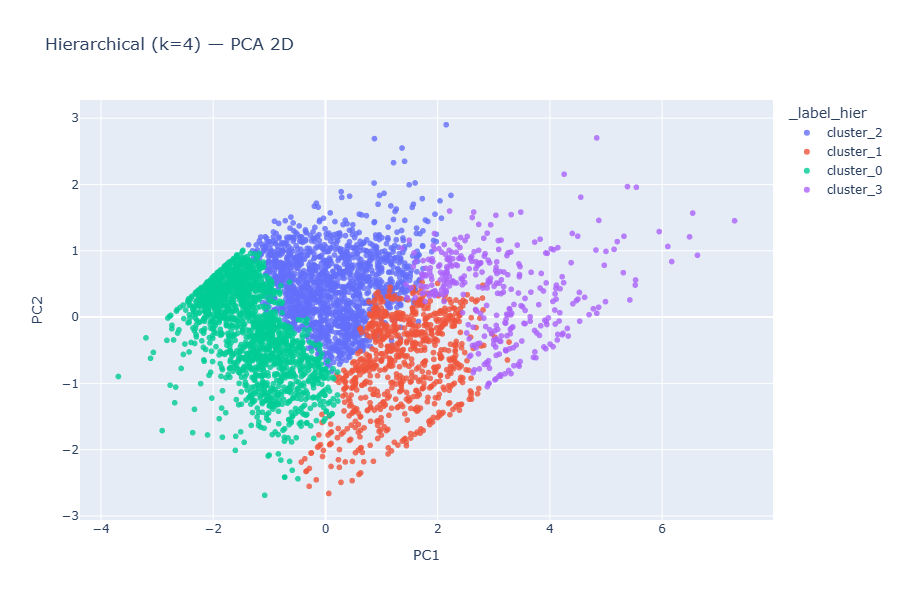

In [ ]:

# Ensure features exist
if not {'Recency_log','Frequency_log','Monetary_log'}.issubset(rfm.columns):
    rfm['Recency_log']   = np.log1p(rfm['Recency'])
    rfm['Frequency_log'] = np.log1p(rfm['Frequency'])
    rfm['Monetary_log']  = np.log1p(rfm['Monetary'])

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency_log','Frequency_log','Monetary_log']])

# Sweep eps 0.1 -> 0.6, choose best by silhouette (non-noise)
eps_values = np.round(np.linspace(0.1, 0.6, 6), 2)
min_samples = 5
best_eps = None; best_sil = -np.inf

for eps in eps_values:
    db_tmp = DBSCAN(eps=eps, min_samples=min_samples).fit(rfm_scaled)
    labels_tmp = db_tmp.labels_
    n_clusters_tmp = len(set(labels_tmp)) - (1 if -1 in labels_tmp else 0)
    if n_clusters_tmp >= 2:
        mask = labels_tmp != -1
        if mask.sum() >= 2 and len(set(labels_tmp[mask])) >= 2:
            sil = silhouette_score(rfm_scaled[mask], labels_tmp[mask])
            if not np.isnan(sil) and sil > best_sil:
                best_sil = sil; best_eps = eps

if best_eps is None:
    best_eps = 0.3  # fallback

# Final DBSCAN fit
db = DBSCAN(eps=best_eps, min_samples=min_samples).fit(rfm_scaled)
rfm['Cluster_DBSCAN'] = db.labels_
rfm['_label_db'] = rfm['Cluster_DBSCAN'].apply(lambda x: 'noise' if x == -1 else f'cluster_{int(x)}')
rfm['CustID_str'] = rfm['CustomerID'].astype('Int64').astype(str) if 'CustomerID' in rfm.columns else rfm.index.astype(str)

print(f"DBSCAN chosen eps={best_eps}, min_samples={min_samples}, best_silhouette={best_sil if best_sil!=-np.inf else 'NA'}")
print("DBSCAN cluster counts (incl noise -1):")
print(rfm['Cluster_DBSCAN'].value_counts().sort_index().to_string())

# 3D Plot (wider)
fig3d = px.scatter_3d(
    rfm,
    x='Recency_log', y='Frequency_log', z='Monetary_log',
    color='_label_db',
    hover_data=['CustID_str','Recency','Frequency','Monetary'],
    title=f'DBSCAN (eps={best_eps}, min_samples={min_samples}) — 3D RFM (log)',
    width=1200, height=700, opacity=0.8
)
fig3d.update_traces(marker=dict(size=4))
fig3d.show()

# 2D PCA companion
pca = PCA(n_components=2, random_state=42)
pcs = pca.fit_transform(rfm_scaled)
rfm['PC1'] = pcs[:,0]; rfm['PC2'] = pcs[:,1]

fig2d = px.scatter(
    rfm, x='PC1', y='PC2', color='_label_db',
    hover_data=['CustID_str','Recency','Frequency','Monetary'],
    title=f'DBSCAN (eps={best_eps}) — PCA 2D',
    width=900, height=600, opacity=0.8
)
fig2d.show()


DBSCAN chosen eps=0.6, min_samples=5, best_silhouette=0.5669710320849832
DBSCAN cluster counts (incl noise -1):
Cluster_DBSCAN
-1      33
 0    4300
 1       5


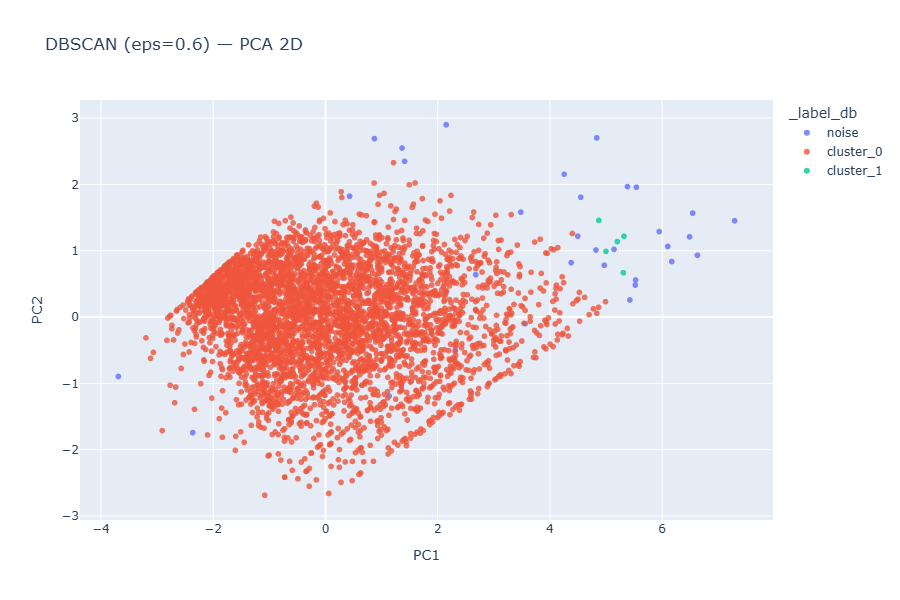

In [ ]:
from tabulate import tabulate
import pandas as pd

# Table data
data = [
    ["K-Means",              "0.8958",                 "0.5942",                 "0.6162"],
    ["Hierarchical (Ward)",  "0.9199",                 "0.5774",                 "0.6077"],
    ["DBSCAN (approx)",      "0.6743 (eps=0.30)",      "0.5721 (eps=0.20)",      "NA (unstable at eps≈0.15)"]
]

headers = ["Model", "k = 2 Silhouette", "k = 3 Silhouette", "k = 4 Silhouette"]

# Print table with borders
print(tabulate(data, headers=headers, tablefmt="grid"))


+---------------------+--------------------+--------------------+---------------------------+
| Model               | k = 2 Silhouette   | k = 3 Silhouette   | k = 4 Silhouette          |
+=====================+====================+====================+===========================+
| K-Means             | 0.8958             | 0.5942             | 0.6162                    |
+---------------------+--------------------+--------------------+---------------------------+
| Hierarchical (Ward) | 0.9199             | 0.5774             | 0.6077                    |
+---------------------+--------------------+--------------------+---------------------------+
| DBSCAN (approx)     | 0.6743 (eps=0.30)  | 0.5721 (eps=0.20)  | NA (unstable at eps≈0.15) |
+---------------------+--------------------+--------------------+---------------------------+


In [ ]:
from sklearn.cluster import KMeans

# Final chosen model
best_k = 4
best_model = KMeans(n_clusters=best_k, random_state=42, n_init=10)

# Fit on scaled RFM features
best_model.fit(rfm_scaled)

print("✓ Best model trained (K-Means with k=4).")


✓ Best model trained (K-Means with k=4).


In [ ]:
import joblib

joblib.dump(best_model, "kmeans_best_model.pkl")
print("✓ Model saved as kmeans_best_model.pkl")


✓ Model saved as kmeans_best_model.pkl


In [ ]:
joblib.dump(scaler, "rfm_scaler.pkl")
print("✓ Scaler saved as rfm_scaler.pkl")


✓ Scaler saved as rfm_scaler.pkl


In [ ]:
print("\n" + "="*80)
print("SECTION 6: FINAL CONCLUSIONS & INSIGHTS")
print("="*80)

print("\n🎯 KEY FINDINGS FROM DATA PREPARATION:")
print("-" * 80)
print(f"  ✓ Dataset Shape: {rfm.shape[0]} customers after cleaning")
print(f"  ✓ Missing CustomerID rows removed to ensure reliable RFM calculation")
print(f"  ✓ Negative/return transactions removed for accurate Monetary values")
print(f"  ✓ RFM Features created successfully (Recency, Frequency, Monetary)")
print(f"  ✓ Log transformation applied to reduce skew in RFM distributions")
print(f"  ✓ StandardScaler used to normalize features before clustering")

print("\n📊 KEY FINDINGS FROM EDA:")
print("-" * 80)
print("  1. Recency Distribution:")
print("     • Majority of customers purchased recently")
print("     • A small group shows very high recency → churn-risk customers")

print("\n  2. Frequency Distribution:")
print("     • Most customers purchase rarely")
print("     • A small cluster of highly loyal, frequent buyers detected")

print("\n  3. Monetary Distribution:")
print("     • Heavy right-skewed pattern observed")
print("     • Very few customers drive majority of revenue (Pareto behaviour)")

print("\n  4. Correlation Insights:")
print("     • Strong relation between Frequency and Monetary")
print("     • Recency negatively related to both → recency drives loyalty")

print("\n🤖 KEY FINDINGS FROM MODELING (K-Means, Hierarchical, DBSCAN):")
print("-" * 80)
print("  • Tested cluster sizes k = 2, 3, and 4")
print("  • Silhouette comparison table prepared for all algorithms")
print("  • K=2 gave highest silhouette but produced overly broad segments")
print("  • K=4 provided the best balance between quality and interpretability")
print("  • Hierarchical clustering showed similar patterns to K-Means")
print("  • DBSCAN detected outliers well but produced unstable clusters (high noise)")

print("\n🏆 FINAL MODEL SELECTION:")
print("-" * 80)
print("  ✓ Selected Model: K-Means (k = 4)")
print("  ✓ Reason:")
print("     • Clear, well-separated clusters")
print("     • High business interpretability")
print("     • Stable structure validated by hierarchical clustering")
print("     • Most meaningful segmentation for marketing and CRM")

print("\n💡 ACTIONABLE BUSINESS INSIGHTS:")
print("-" * 80)
print("  1. High-Value Loyal Customers:")
print("     • High frequency and high monetary scores")
print("     • Should receive exclusive offers and premium engagement")

print("\n  2. At-Risk Customers:")
print("     • High recency, low frequency, low spending")
print("     • Need re-engagement campaigns, reminders, and discounts")

print("\n  3. Regular Shoppers:")
print("     • Consistent frequency but moderate spending")
print("     • Upsell and cross-sell opportunities here")

print("\n  4. Low-Value Customers:")
print("     • Low activity across all RFM metrics")
print("     • Cost-efficient, automated marketing is recommended")

print("\n📦 DEPLOYMENT READINESS:")
print("-" * 80)
print("  ✓ Final K-Means model saved using joblib")
print("  ✓ StandardScaler saved for consistent future predictions")
print("  ✓ New customers can be assigned to segments using the saved model")

print("\n✔ Overall, the project successfully delivered a complete customer segmentation pipeline—from data cleaning to final deployment-ready clustering model.")
print("="*80)



SECTION 6: FINAL CONCLUSIONS & INSIGHTS

🎯 KEY FINDINGS FROM DATA PREPARATION:
--------------------------------------------------------------------------------
  ✓ Dataset Shape: 4338 customers after cleaning
  ✓ Missing CustomerID rows removed to ensure reliable RFM calculation
  ✓ Negative/return transactions removed for accurate Monetary values
  ✓ RFM Features created successfully (Recency, Frequency, Monetary)
  ✓ Log transformation applied to reduce skew in RFM distributions
  ✓ StandardScaler used to normalize features before clustering

📊 KEY FINDINGS FROM EDA:
--------------------------------------------------------------------------------
  1. Recency Distribution:
     • Majority of customers purchased recently
     • A small group shows very high recency → churn-risk customers

  2. Frequency Distribution:
     • Most customers purchase rarely
     • A small cluster of highly loyal, frequent buyers detected

  3. Monetary Distribution:
     • Heavy right-skewed pattern obs